In [1]:
import pandas as pd

In [2]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from tqdm import tqdm

In [3]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [5]:
df = pd.read_csv('df.csv')
df.shape

(78791, 9)

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in df['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
print(tokenized_tweets)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [25]:
#creating a stop words list - these words don't add much value
from nltk.corpus import stopwords
import string

#adding additional words I don't find to be that valuable
additional_stopwords = ['https', 'I', 'com', 'http', 'RT', 'co', 'the', 'amp', 'the', 'lt', 'A', 'www', 'rt', 'got', 'get', 
                        'ly', 'u', 'improvefilmtitlesbyaddinginmypants', 'nan', 's', '4', '10', '3', 'gt', '3', 'in', 'also', 
                        'img', '2', '1', 'put', 'e'] 

stopwords_list = stopwords.words('english')

stopwords_list += list(string.punctuation)

stopwords_list += additional_stopwords

print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
#isolating every word within tweets for the Inception movie (not including stop words)
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list:
            tweets.append(word)  

tweets

['watching',
 'inception',
 'joseph',
 'gordon',
 'levitt',
 'oh',
 'yeah',
 'ken',
 'watanabe',
 'reason',
 'see',
 'inception',
 'see',
 'tom',
 'hardy',
 'nw',
 'inception',
 'yh',
 'yh',
 'yh',
 'stale',
 'girl',
 'waheva',
 'according',
 'ibo',
 'proverb',
 'translated',
 'english',
 'older',
 'wine',
 'sweeter',
 'taste',
 'black',
 'swan',
 'social',
 'network',
 'inception',
 'si',
 'eat',
 'pray',
 'love',
 'recuperate',
 'si',
 'bifate',
 'another',
 'suggestions',
 'voted',
 'inception',
 'bestscreenplay',
 'oscar',
 'via',
 'theacademy',
 'soc',
 'li',
 'miotdtd',
 'spastikchuwawa',
 'inception',
 'soundtrack',
 'finally',
 'watching',
 'inception',
 'dad',
 'fixed',
 'surround',
 'sound',
 'inception',
 'intennnnse',
 'like',
 'inception',
 'play',
 'wit',
 'brain',
 'jonathanqueally',
 'could',
 'jonathan',
 'ross',
 'performed',
 'inception',
 'sure',
 'able',
 'sleep',
 'dtapp91',
 'new',
 'inception',
 'kids',
 'r',
 'alright',
 'town',
 'classic',
 'training',
 'day',

In [27]:
#freqDist - frequency of words within a text, in this case tweets about all movies
fdist = FreqDist(tweets)

In [28]:
# wc = WordCloud()
# wc.generate(article.text)
# plt.imshow(wc, interpolation="bilinear")
# plt.axis('off')
# plt.show()

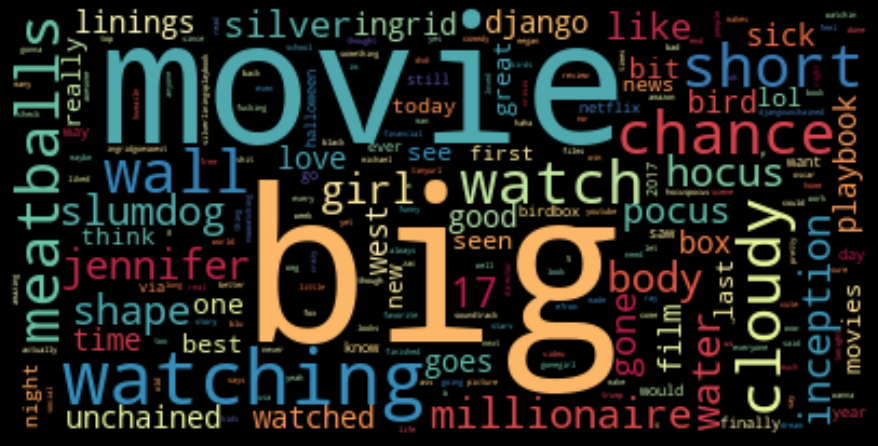

In [29]:
# Create the word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(fdist)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(12,8), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('images/birdie.jpg')

https://towardsdatascience.com/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32

In [15]:
from PIL import Image
from wordcloud import STOPWORDS
import pathlib

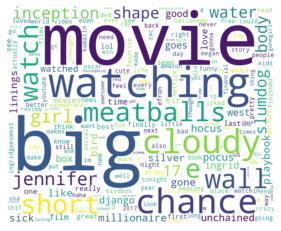

In [16]:
mask = np.array(Image.open('images/twittericon.jpg'))
wc = WordCloud(mask=mask, stopwords=STOPWORDS, background_color="white",
               max_words=200, max_font_size=256,
               random_state=27, width=mask.shape[1],
               height=mask.shape[0])
wc.generate_from_frequencies(fdist)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [35]:
mask = Image.open(pathlib.Path('images/test.png'))
print(np.array(mask))

# wc = WordCloud(stopwords=STOPWORDS,
#                mask=mask, background_color="white",
#                max_words=2000, max_font_size=256,
#                random_state=42, width=mask.shape[1],
#                height=mask.shape[0])
# wc.generate_from_frequencies(fdist)
# plt.imshow(wc, interpolation="bilinear")
# plt.axis('off')
# plt.show()

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 ...

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]
